In [46]:
# 웹 스크래핑 가능 유무 확인을 위한 모듈 탑재
import requests

# 웹 스크래핑 대상 주소 저장
url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=2'

# HTTP 요청을 대상 주소로 보내고, HTTP 응답 받아서 저장하기
page = requests.get(url)

# 응답 내용 확인하기
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

## 요청 헤더에 값 설정 후 웹 정보 확인하기
requests.get() 메소드에 headers 인수를 추가ㅐ user-agent를 설정하고 소스 코드 실행

In [47]:
# 헤더 정보 설정하기
my_headers = {'user-agent': 'Mozilla/5.0'}

# 요청 헤더 설정하여 HTTP 
page = requests.get(url, headers=my_headers)

# 응답 내용 확인하기
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230531104931/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230531104931/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230531104931/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230531104931/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230531104931/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230531104931/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230531104931/css/world.css">
</head>
<body>
<script language="JavaS

# 웹 데이터 수집하기
## HTML 테이블 데이터 가져오기

In [48]:
# 판다스 라이브러리 탑재
import pandas as pd

# HTML 페이지에서 테이블 추출
pages = pd.read_html(page.text)

# 추출한 데이터 타입 확인하기
type(pages)

list

## 필요한 테이블 데이터 고르기

In [49]:
# 페이지 개수 확인하기
len(pages)

2

In [50]:
# 첫 번째 테이블 내용 확인하기
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.06.01,70900.0,500.0,70900.0,71600.0,70600.0,14669296.0
2,2023.05.31,71400.0,900.0,72400.0,72500.0,71000.0,25666087.0
3,2023.05.30,72300.0,2000.0,71300.0,72300.0,71200.0,27476897.0
4,2023.05.26,70300.0,1500.0,69800.0,70400.0,69500.0,19549511.0
5,2023.05.25,68800.0,300.0,69900.0,70000.0,68700.0,14231160.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.05.24,68500.0,100.0,68100.0,68700.0,68000.0,8192896.0


In [51]:
# 두 번째 테이블 내용 확인하기
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


# 웹 페이지 URL 분석하기
## URL 주소 분석하기
## 페이징 처리가 되어 있는 데이터 수집하기
## 페이지 번호 증가용 반복문 작성

In [52]:
# 페이지 번호를 제외한 주소 저장
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='

# 데이터를 축적할 데이터프레임 생성
all_tables = pd.DataFrame()

In [53]:
# 페이지 번호 증가용 반복문
for page_number in range(1,2):
    
    # 페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)
    
    # 주소 확인하기
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    
    # HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers = my_headers)
    
    # 테이블 추출
    table = pd.read_html(page.text)[0]
    
    # 수행할 내용 확인
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
    
    # 데이터 축적용 데이터프레임에 테이블 추가
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄에 15 줄 추가


## 결손치 제거

In [54]:
# 전체 테이블 결과 확인
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.06.16,71800.0,300.0,71800.0,71900.0,70900.0,14267379.0
2,2023.06.15,71500.0,400.0,72100.0,72300.0,71300.0,13614994.0
3,2023.06.14,71900.0,100.0,72100.0,72200.0,71100.0,12541046.0
4,2023.06.13,72000.0,1000.0,71700.0,72200.0,71600.0,13227285.0
5,2023.06.12,71000.0,1000.0,72100.0,72400.0,70800.0,12064287.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023.06.09,72000.0,1100.0,71100.0,72300.0,70800.0,15050209.0


In [55]:
# 결손치 제거
all_tables.dropna(inplace=True)

# 데이터 확인하기
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.06.16,71800.0,300.0,71800.0,71900.0,70900.0,14267379.0
2,2023.06.15,71500.0,400.0,72100.0,72300.0,71300.0,13614994.0
3,2023.06.14,71900.0,100.0,72100.0,72200.0,71100.0,12541046.0
4,2023.06.13,72000.0,1000.0,71700.0,72200.0,71600.0,13227285.0
5,2023.06.12,71000.0,1000.0,72100.0,72400.0,70800.0,12064287.0
9,2023.06.09,72000.0,1100.0,71100.0,72300.0,70800.0,15050209.0
10,2023.06.08,70900.0,100.0,70400.0,70900.0,70000.0,19165568.0
11,2023.06.07,71000.0,700.0,71300.0,71600.0,70800.0,14796613.0
12,2023.06.05,71700.0,500.0,72700.0,72700.0,71400.0,12686829.0
13,2023.06.02,72200.0,1300.0,71700.0,72200.0,71600.0,12161798.0


## 10페이지 데이터 수집하기

In [56]:
# 데이터를 축적할 데이터프레임 생성
all_tables = pd.DataFrame()

# 페이지 번호 증가용 반복문
for page_number in range(1, 11):
    
    # 페이지 번호 추가한 주소 완성
    full_url = new_url + str(page_number)
    
    # 주소 확인하기
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    
    # HTTP 요청 전송 후 응답 받아오기
    page = requests.get(full_url, headers = my_headers)
    
    # 테이블 추출
    table = pd.read_html(page.text)[0]
    
    # 수행할 내용 확인
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')
    
    # 데이터 축적용 데이터프레임에 테이블 추가
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄에 15 줄 추가
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=2)
전체 15 줄에 15 줄 추가
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=3)
전체 30 줄에 15 줄 추가
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=4)
전체 45 줄에 15 줄 추가
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=5)
전체 60 줄에 15 줄 추가
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=6)
전체 75 줄에 15 줄 추가
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=7)
전체 90 줄에 15 줄 추가
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=8)
전체 105 줄에 15 줄 추가
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=9)
전체 120 줄에 15 줄 추가
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=10)
전체 135 줄에 15 줄 추가


In [57]:
# 결손치 제거
all_tables.dropna(inplace=True)

# 데이터 확인하기
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.06.16,71800.0,300.0,71800.0,71900.0,70900.0,14267379.0
2,2023.06.15,71500.0,400.0,72100.0,72300.0,71300.0,13614994.0
3,2023.06.14,71900.0,100.0,72100.0,72200.0,71100.0,12541046.0
4,2023.06.13,72000.0,1000.0,71700.0,72200.0,71600.0,13227285.0
5,2023.06.12,71000.0,1000.0,72100.0,72400.0,70800.0,12064287.0
...,...,...,...,...,...,...,...
9,2023.01.27,64600.0,700.0,64400.0,65000.0,63900.0,18760182.0
10,2023.01.26,63900.0,500.0,63800.0,63900.0,63300.0,13278277.0
11,2023.01.25,63400.0,1600.0,63500.0,63700.0,63000.0,16822710.0
12,2023.01.20,61800.0,300.0,62100.0,62300.0,61100.0,9646327.0


# 데이터 시각화
## 상자 수염 그래프
Box-and-whisker plot  
박스 플랏 => Box plot

# 시각화 대상 데이터 추출하기
## 한글 열 이름을 영문으로 변경하기

In [58]:
# 열 이름 영문으로 변경
all_tables.rename(columns={'날짜': 'date',
                           '종가': 'end_price',
                           '시가': 'start_price',
                           '고가': 'highest_price',
                           '저가': 'lowest_price'}
                 , inplace=True)

# 데이터 확인하기
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.06.16,71800.0,300.0,71800.0,71900.0,70900.0,14267379.0
2,2023.06.15,71500.0,400.0,72100.0,72300.0,71300.0,13614994.0
3,2023.06.14,71900.0,100.0,72100.0,72200.0,71100.0,12541046.0
4,2023.06.13,72000.0,1000.0,71700.0,72200.0,71600.0,13227285.0
5,2023.06.12,71000.0,1000.0,72100.0,72400.0,70800.0,12064287.0
...,...,...,...,...,...,...,...
9,2023.01.27,64600.0,700.0,64400.0,65000.0,63900.0,18760182.0
10,2023.01.26,63900.0,500.0,63800.0,63900.0,63300.0,13278277.0
11,2023.01.25,63400.0,1600.0,63500.0,63700.0,63000.0,16822710.0
12,2023.01.20,61800.0,300.0,62100.0,62300.0,61100.0,9646327.0


# 필요 없는 열 제거하기

In [59]:
# 필요 없는 열 제거
all_tables.drop(['전일비', '거래량'], axis = 1, inplace=True)

# 데이터 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2023.06.16,71800.0,71800.0,71900.0,70900.0
2,2023.06.15,71500.0,72100.0,72300.0,71300.0
3,2023.06.14,71900.0,72100.0,72200.0,71100.0
4,2023.06.13,72000.0,71700.0,72200.0,71600.0
5,2023.06.12,71000.0,72100.0,72400.0,70800.0
...,...,...,...,...,...
9,2023.01.27,64600.0,64400.0,65000.0,63900.0
10,2023.01.26,63900.0,63800.0,63900.0,63300.0
11,2023.01.25,63400.0,63500.0,63700.0,63000.0
12,2023.01.20,61800.0,62100.0,62300.0,61100.0


## 중앙값 추가하기

In [60]:
# 중앙값 열 추가
all_tables['midian_price'] = all_tables['highest_price'] - ((all_tables['highest_price'] - all_tables['lowest_price']) / 2)

# 값 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price
1,2023.06.16,71800.0,71800.0,71900.0,70900.0,71400.0
2,2023.06.15,71500.0,72100.0,72300.0,71300.0,71800.0
3,2023.06.14,71900.0,72100.0,72200.0,71100.0,71650.0
4,2023.06.13,72000.0,71700.0,72200.0,71600.0,71900.0
5,2023.06.12,71000.0,72100.0,72400.0,70800.0,71600.0
...,...,...,...,...,...,...
9,2023.01.27,64600.0,64400.0,65000.0,63900.0,64450.0
10,2023.01.26,63900.0,63800.0,63900.0,63300.0,63600.0
11,2023.01.25,63400.0,63500.0,63700.0,63000.0,63350.0
12,2023.01.20,61800.0,62100.0,62300.0,61100.0,61700.0


## 집계를 위한 달 정보 추가하기

In [61]:
# 월 정보 열 추가
all_tables['month'] = all_tables['date'].str[0:7]

# 값 확인하기
all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price,month
1,2023.06.16,71800.0,71800.0,71900.0,70900.0,71400.0,2023.06
2,2023.06.15,71500.0,72100.0,72300.0,71300.0,71800.0,2023.06
3,2023.06.14,71900.0,72100.0,72200.0,71100.0,71650.0,2023.06
4,2023.06.13,72000.0,71700.0,72200.0,71600.0,71900.0,2023.06
5,2023.06.12,71000.0,72100.0,72400.0,70800.0,71600.0,2023.06
...,...,...,...,...,...,...,...
9,2023.01.27,64600.0,64400.0,65000.0,63900.0,64450.0,2023.01
10,2023.01.26,63900.0,63800.0,63900.0,63300.0,63600.0,2023.01
11,2023.01.25,63400.0,63500.0,63700.0,63000.0,63350.0,2023.01
12,2023.01.20,61800.0,62100.0,62300.0,61100.0,61700.0,2023.01


## 색인 변경 및 정렬하기

In [62]:
# 날짜를 색인으로 지정하기
all_tables.set_index('date', inplace=True)

# 날짜 오름차순으로 정렬하기
all_tables.sort_index(inplace=True)

# 값 확인하기
all_tables

,end_price,start_price,highest_price,lowest_price,midian_price,month
date,,,,,,
2023.01.19,61500.0,60500.0,61500.0,60400.0,60950.0,2023.01
2023.01.20,61800.0,62100.0,62300.0,61100.0,61700.0,2023.01
2023.01.25,63400.0,63500.0,63700.0,63000.0,63350.0,2023.01
2023.01.26,63900.0,63800.0,63900.0,63300.0,63600.0,2023.01
2023.01.27,64600.0,64400.0,65000.0,63900.0,64450.0,2023.01
...,...,...,...,...,...,...
2023.06.12,71000.0,72100.0,72400.0,70800.0,71600.0,2023.06
2023.06.13,72000.0,71700.0,72200.0,71600.0,71900.0,2023.06
2023.06.14,71900.0,72100.0,72200.0,71100.0,71650.0,2023.06


# 그래프 그리기
## 기본 선 그래프

<AxesSubplot:xlabel='date'>

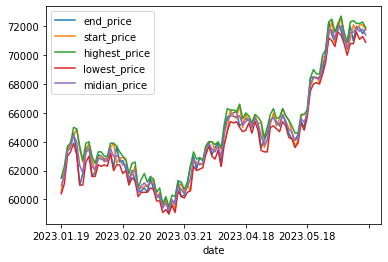

In [63]:
# 전체 숫자 데이터 선 그래프로 그리기
all_tables.plot.line()

## 선 그래프 구역별로 나눠서 학인하기

<AxesSubplot:xlabel='date'>

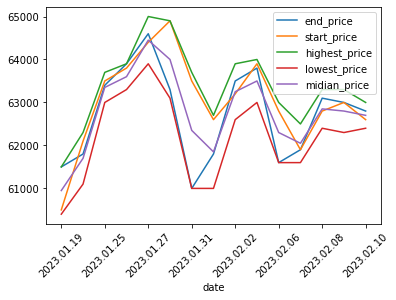

In [64]:
# 앞 15일치 데이터 선 그래프로 그리기
all_tables[:15].plot.line(rot=45)

## 상자 수염 그래프

<AxesSubplot:title={'center':'midian_price'}, xlabel='[month]'>

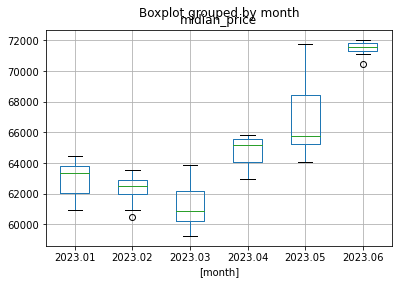

In [65]:
# 일일 시세 중앙값의 상자 수염 그래프 그리기
all_tables.boxplot(column=['midian_price'], by=['month'])